In [1]:
import cv2
import numpy as np
from skimage.measure import compare_ssim, compare_nrmse
import imutils
import matplotlib.pyplot as plt
from PIL import Image
import glob

%matplotlib inline

### Omaha

In [2]:
img8 = cv2.imread('./images/omaha_before.jpg')
img9 = cv2.imread('./images/omaha_after.jpg')

In [3]:
gray8 = cv2.cvtColor(img8, cv2.COLOR_BGR2GRAY)
gray9 = cv2.cvtColor(img9, cv2.COLOR_BGR2GRAY)

In [4]:
diff = cv2.absdiff(img8, img9)
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

## find the nozero regions in the gray
imask =  gray>0

## create a Mat like img2
canvas = np.zeros_like(img9, np.uint8)

## set mask 
canvas[imask] = img9[imask]
cv2.imwrite('./Diff_result_images/result_omaha_pair.png', canvas)

True

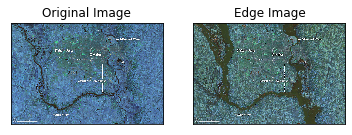

In [5]:
plt.subplot(121),plt.imshow(img8)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img9,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

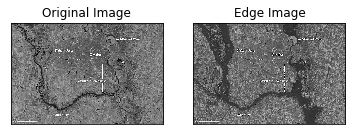

In [6]:
plt.subplot(121),plt.imshow(gray8,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray9,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
(score, diff) = compare_ssim(gray8, gray9, multichannel=True, full=True)
diff = (diff * 255).astype("uint8")

In [7]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

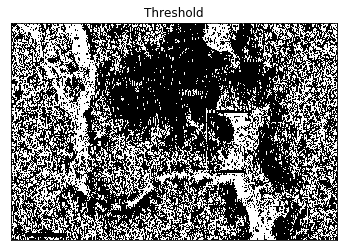

In [8]:
plt.subplot(),plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

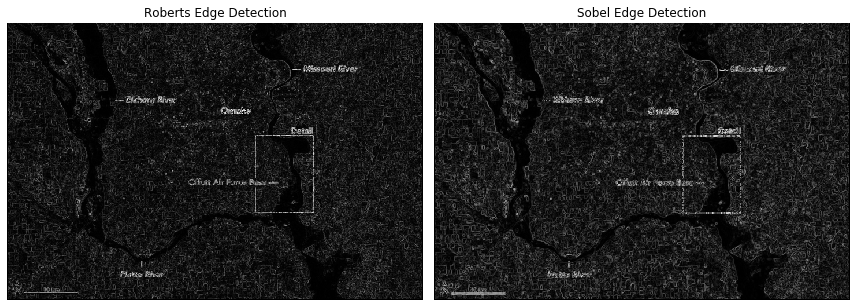

In [10]:
from skimage.filters import roberts, sobel


edge_roberts = roberts(gray9)
edge_sobel = sobel(gray9)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(12, 10))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

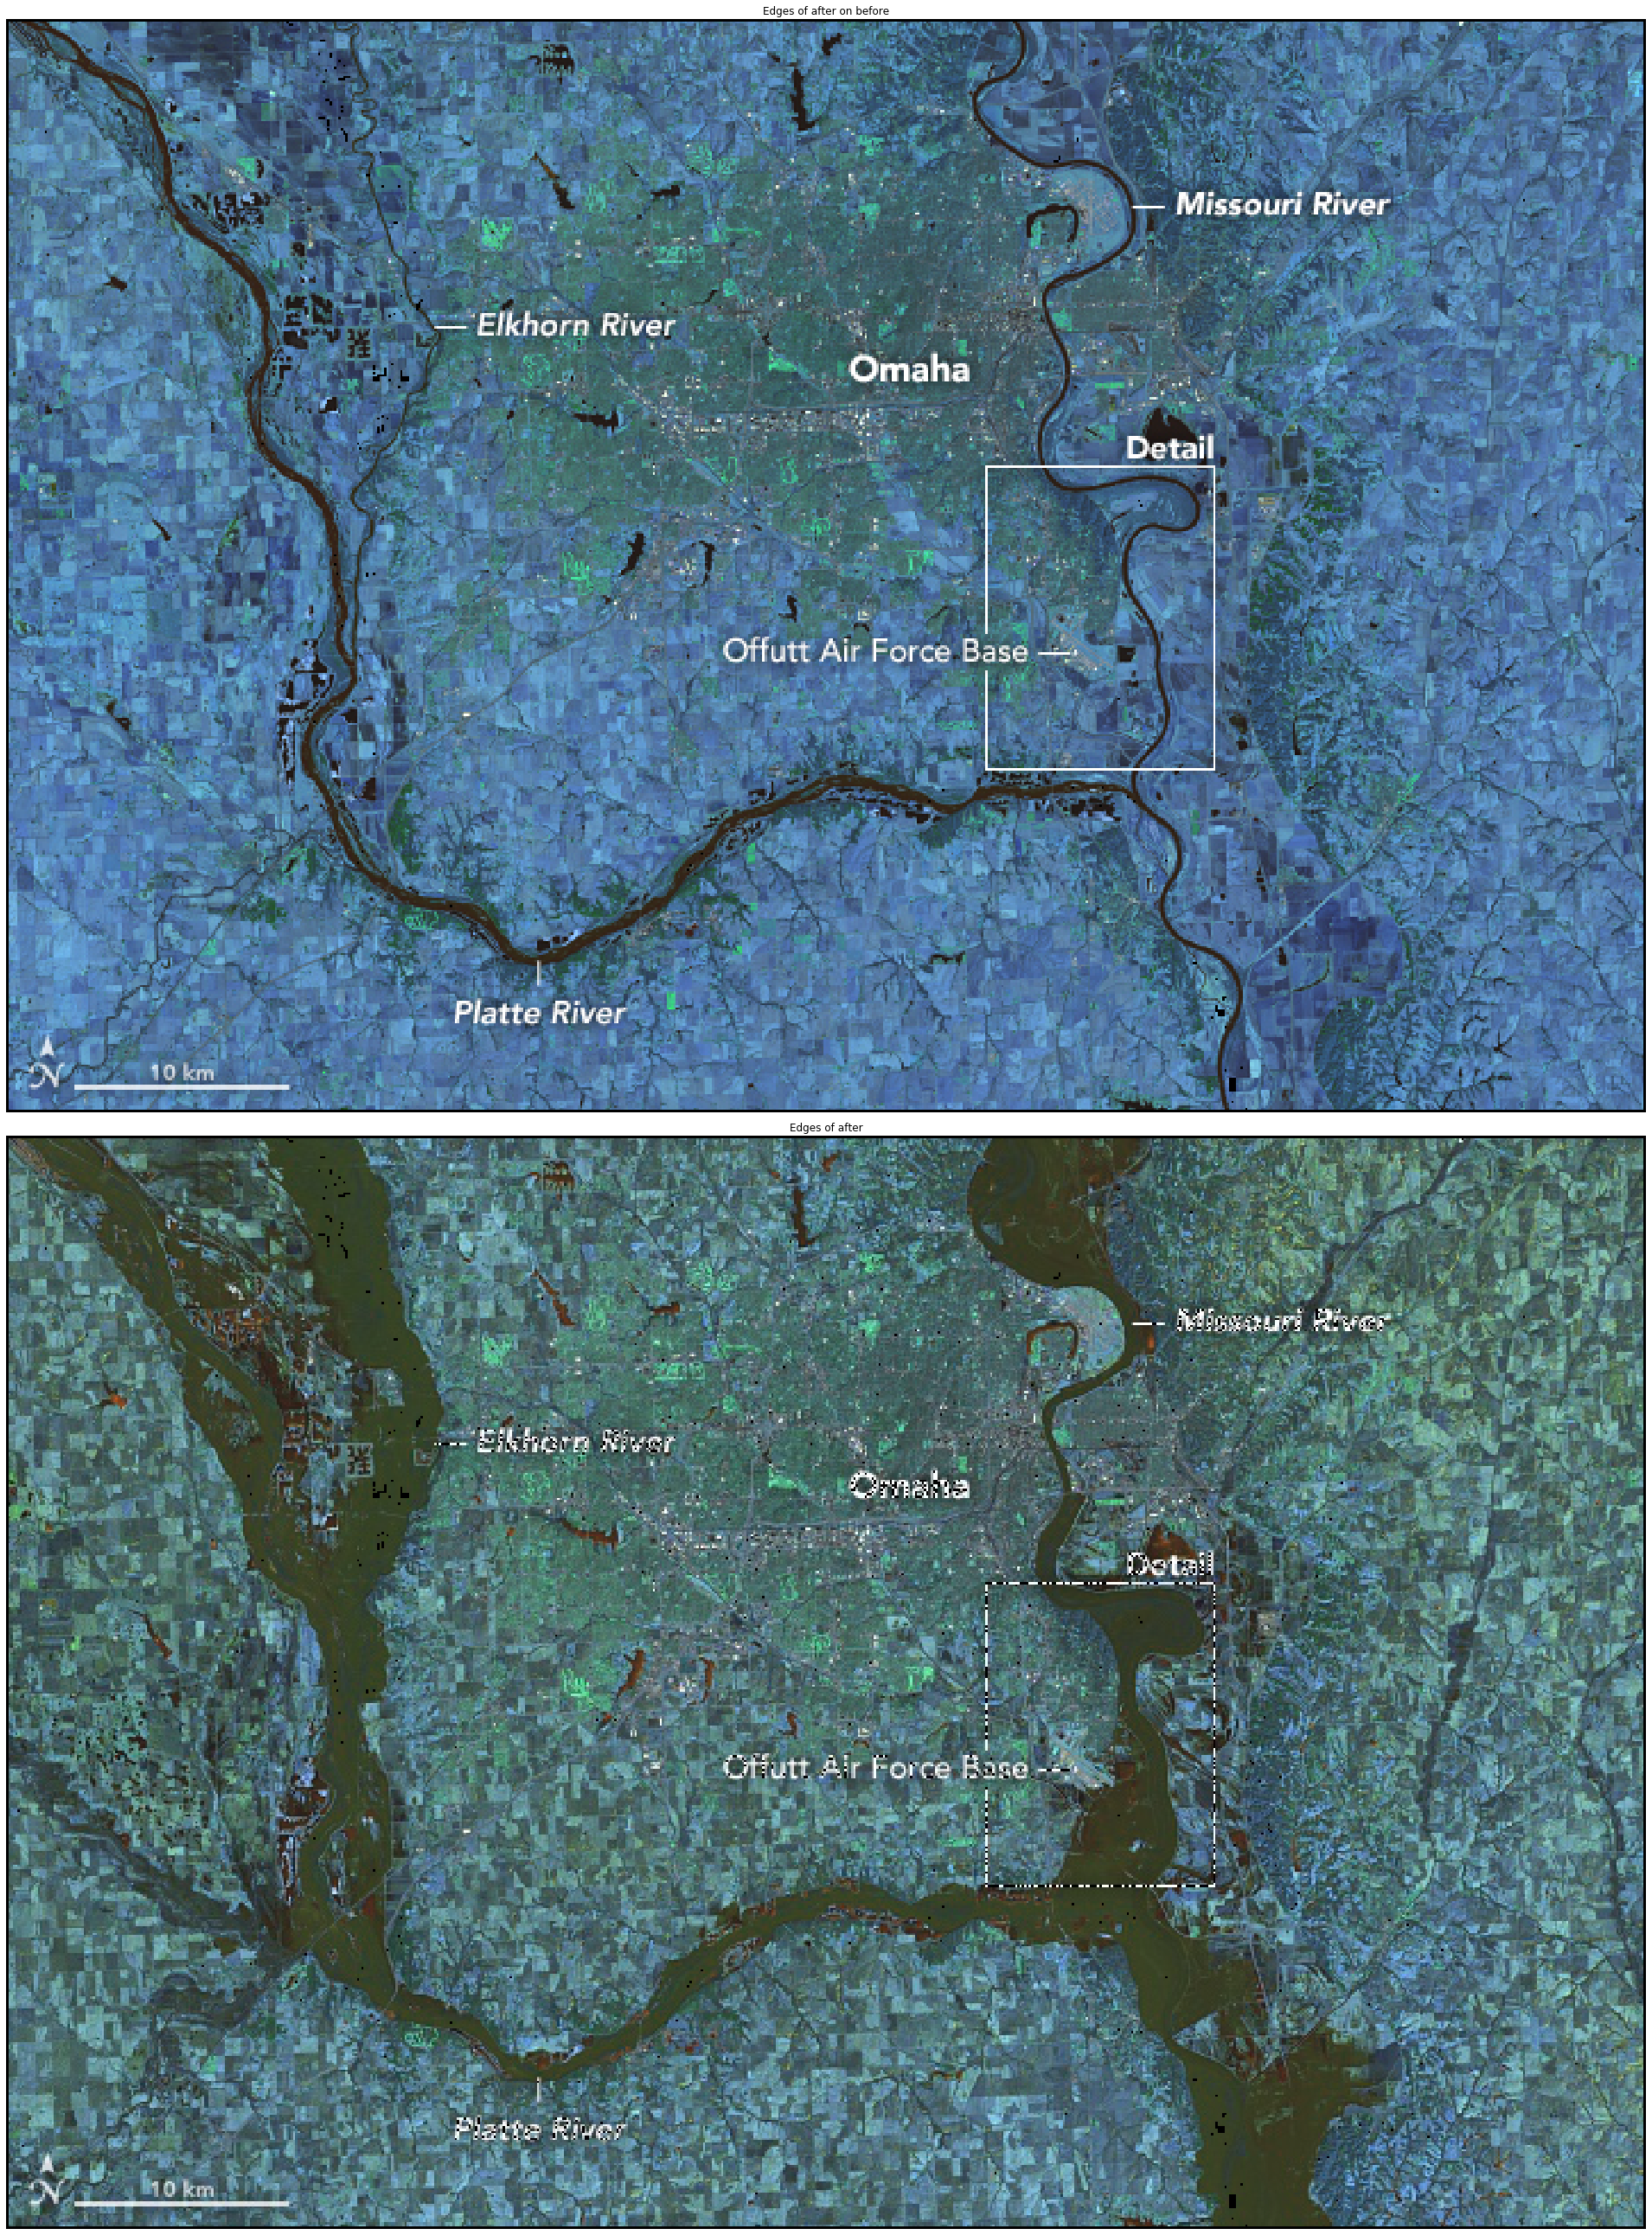

In [15]:
imask =  edge_sobel>00
new_canvas = np.zeros_like(img8, np.uint8) 
another_canvas = np.zeros_like(img9, np.uint8)

## set mask 
new_canvas[imask] = img8[imask]
another_canvas[imask] = img9[imask]

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,
                       figsize=(40, 36))

ax[0].imshow(new_canvas, cmap=plt.cm.gray)
ax[0].set_title('Edges of after on before')

ax[1].imshow(another_canvas, cmap=plt.cm.gray)
ax[1].set_title('Edges of after')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

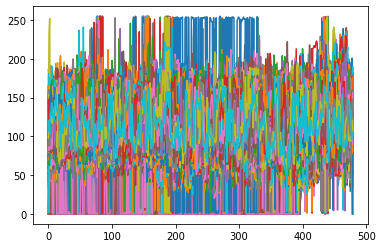

In [47]:
fig , ax = plt.subplots()
ax.plot(draw_cnts)

In [37]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
# compute the bounding box of the contour and then draw the
# bounding box on both input images to represent where the two
# images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(gray8, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(gray9, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.drawContours(gray9, cnts, -1, (0,255,0), 3)
    
#     fig, (axleft, axright) = plt.subplots(figsize=(12,10), ncols=2)
#     axleft.imshow(gray8, cmap=plt.cm.gray)
#     axright.imshow(gray9, cmap=plt.cm.gray)

#     for c in cnts:
#         axleft.plot(c[:, 1], c[:, 0], linewidth=1)
#         axright.plot(c[:, 1], c[:, 0], linewidth=1)


#     #ax.axis('image')
#     axleft.set_xticks([])
#     axleft.set_yticks([])
#     axright.set_xticks([])
#     axright.set_yticks([])

KeyboardInterrupt: 

In [89]:
# cv2.imshow("Original", img8)
# cv2.imshow("Modified", img9)
# cv2.imshow("Diff", diff)
# cv2.imshow("Thresh", thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows(0)

True

In [ ]:
# write files to Diff_result_images
cv2.imwrite('./Diff_result_images/Original_omaha_pair.jpg', img0)
cv2.imwrite('./Diff_result_images/Modified_omaha_pair.jpg', img1)
cv2.imwrite('./Diff_result_images/Difference_omaha_pair.jpg', diff)
cv2.imwrite('./Diff_result_images/Thresh_omaha_pair.jpg', thresh)

### first pair

In [29]:
img0 = cv2.imread('Outputimages/cropped0.jpg')
img1 = cv2.imread('Outputimages/cropped1.jpg')

In [30]:
gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [14]:
diff = cv2.absdiff(img0, img1)
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

## find the nozero regions in the gray
imask =  gray>0

## create a Mat like img2
canvas = np.zeros_like(img1, np.uint8)

## set mask 
canvas[imask] = img1[imask]
cv2.imwrite('./Diff_result_images/result_1_pair.png', canvas)

True

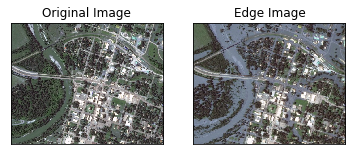

In [15]:
plt.subplot(121),plt.imshow(img0,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img1,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

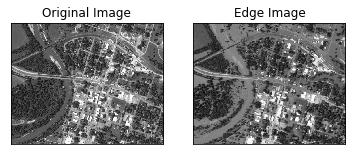

In [16]:
plt.subplot(121),plt.imshow(gray0,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray1,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [31]:
(score, diff) = compare_ssim(gray0, gray1, multichannel=True, full=True)
diff = (diff * 255).astype("uint8")

In [32]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

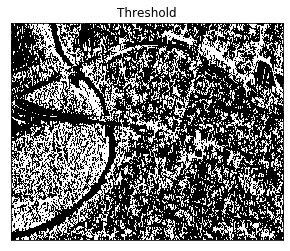

In [19]:
plt.subplot(),plt.imshow(thresh,cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
thresh.shape

(395, 495)

In [33]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
# compute the bounding box of the contour and then draw the
# bounding box on both input images to represent where the two
# images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(gray0, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(gray1, (x, y), (x + w, y + h), (0, 0, 255), 2)

In [34]:
cnts

[array([[[387, 394]]], dtype=int32),
 array([[[321, 394]]], dtype=int32),
 array([[[287, 394]],
 
        [[288, 394]]], dtype=int32),
 array([[[233, 394]],
 
        [[234, 394]]], dtype=int32),
 array([[[198, 394]]], dtype=int32),
 array([[[192, 394]]], dtype=int32),
 array([[[168, 394]]], dtype=int32),
 array([[[165, 394]]], dtype=int32),
 array([[[138, 394]],
 
        [[142, 394]]], dtype=int32),
 array([[[100, 394]],
 
        [[101, 394]]], dtype=int32),
 array([[[478, 393]],
 
        [[478, 394]],
 
        [[479, 393]]], dtype=int32),
 array([[[471, 393]]], dtype=int32),
 array([[[451, 393]],
 
        [[451, 394]]], dtype=int32),
 array([[[447, 393]],
 
        [[447, 394]]], dtype=int32),
 array([[[437, 393]],
 
        [[437, 394]]], dtype=int32),
 array([[[429, 393]],
 
        [[429, 394]]], dtype=int32),
 array([[[414, 393]]], dtype=int32),
 array([[[406, 393]],
 
        [[406, 394]]], dtype=int32),
 array([[[265, 393]],
 
        [[265, 394]],
 
        [[266, 393]],


In [20]:
# cv2.imshow("Original", img0)
# cv2.imshow("Modified", img1)
# cv2.imshow("Diff", diff)
# cv2.imshow("Thresh", thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows(0)

True

In [ ]:
# writing files to Diff_result_images

cv2.imwrite('./Diff_result_images/Original_1_pair.jpg', img0)
cv2.imwrite('./Diff_result_images/Modified_1_pair.jpg', img1)
cv2.imwrite('./Diff_result_images/Difference_1_pair.jpg', diff)
cv2.imwrite('./Diff_result_images/Thresh_1_pair.jpg', thresh)

[]

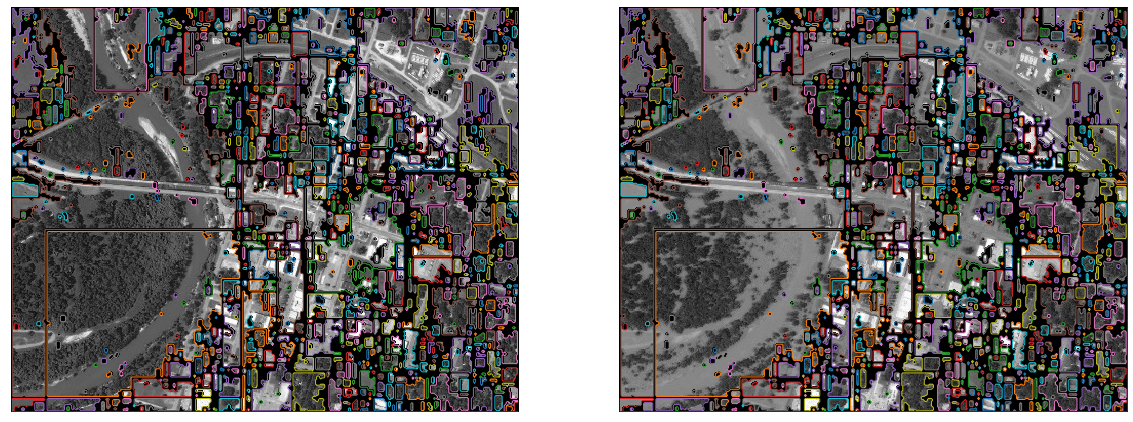

In [23]:
contours = measure.find_contours(gray0, 0.8)

# Display the image and plot all contours found
fig, (axleft, axright) = plt.subplots(figsize=(20,18), ncols=2)

                       
axleft.imshow(gray0, cmap=plt.cm.gray)
axright.imshow(gray1, cmap=plt.cm.gray)

for contour in contours:
    axleft.plot(contour[:, 1], contour[:, 0], linewidth=1)
    axright.plot(contour[:, 1], contour[:, 0], linewidth=1)


#ax.axis('image')
axleft.set_xticks([])
axleft.set_yticks([])
axright.set_xticks([])
axright.set_yticks([])

### second pair

In [37]:
img2 = cv2.imread('Outputimages/cropped2.jpg')
img3 = cv2.imread('Outputimages/cropped3.jpg')

In [38]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

In [39]:
diff = cv2.absdiff(img2, img3)
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

## find the nozero regions in the gray
imask =  gray>0

## create a Mat like img2
canvas = np.zeros_like(img3, np.uint8)

## set mask 
canvas[imask] = img3[imask]
cv2.imwrite('./Diff_result_images/result_2_pair.png', canvas)

True

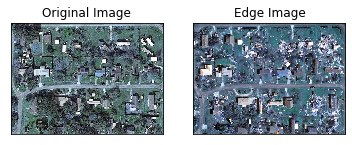

In [40]:
plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

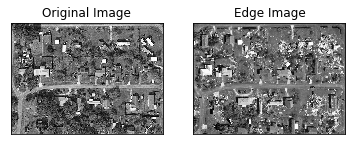

In [41]:
plt.subplot(121),plt.imshow(gray2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray3,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [42]:
(score, diff) = compare_ssim(gray2, gray3, multichannel=True, full=True)
diff = (diff * 255).astype("uint8")

In [43]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

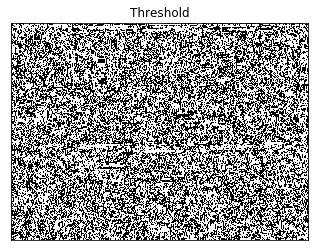

In [44]:
plt.subplot(),plt.imshow(thresh,cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

In [67]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
# compute the bounding box of the contour and then draw the
# bounding box on both input images to represent where the two
# images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(gray2, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(gray3, (x, y), (x + w, y + h), (0, 0, 255), 2)

# cv2.imshow("Original", img2)
# cv2.imshow("Modified", img3)
# cv2.imshow("Diff", diff)
# cv2.imshow("Thresh", thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows(0)

True

In [31]:
# writing files to Diff_result_images

cv2.imwrite('./Diff_result_images/Original_2_pair.jpg', img0)
cv2.imwrite('./Diff_result_images/Modified_2_pair.jpg', img1)
cv2.imwrite('./Diff_result_images/Difference_2_pair.jpg', diff)
cv2.imwrite('./Diff_result_images/Thresh_2_pair.jpg', thresh)

### Building image

In [ ]:
img8 = cv2.imread('./images/omaha_before.jpg')
img9 = cv2.imread('./images/omaha_after.jpg')

In [ ]:
gray8 = cv2.cvtColor(img8, cv2.COLOR_BGR2GRAY)
gray9 = cv2.cvtColor(img9, cv2.COLOR_BGR2GRAY)

In [ ]:
diff = cv2.absdiff(img8, img9)
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

## find the nozero regions in the gray
imask =  gray>0

## create a Mat like img2
canvas = np.zeros_like(img9, np.uint8)

## set mask 
canvas[imask] = img9[imask]
cv2.imwrite('./Diff_result_images/result_omaha_pair.png', canvas)

In [ ]:
plt.subplot(121),plt.imshow(img8,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img9,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
plt.subplot(121),plt.imshow(gray8,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray9,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
(score, diff) = compare_ssim(gray8, gray9, multichannel=True, full=True)
diff = (diff * 255).astype("uint8")

In [ ]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [ ]:
plt.subplot(),plt.imshow(thresh,cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from skimage.filters import roberts, sobel


edge_roberts = roberts(gray9)
edge_sobel = sobel(gray9)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(12, 10))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
imask =  edge_sobel>0
new_canvas = np.zeros_like(img8, np.uint8)
another_canvas = np.zeros_like(img8, np.uint8)

## set mask 
new_canvas[imask] = img8[imask]
another_canvas[imask] = img9[imask]

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 18))

ax[0].imshow(new_canvas, cmap=plt.cm.gray)
ax[0].set_title('Edges of after on before')

ax[1].imshow(another_canvas, cmap=plt.cm.gray)
ax[1].set_title('Edges of after')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
contours = measure.find_contours(gray0, 0.8)

# Display the image and plot all contours found
fig, (axleft, axright) = plt.subplots(figsize=(20,18), ncols=2)

                       
axleft.imshow(gray0, cmap=plt.cm.gray)
axright.imshow(gray1, cmap=plt.cm.gray)

for contour in contours:
    axleft.plot(contour[:, 1], contour[:, 0], linewidth=1)
    axright.plot(contour[:, 1], contour[:, 0], linewidth=1)


#ax.axis('image')
axleft.set_xticks([])
axleft.set_yticks([])
axright.set_xticks([])
axright.set_yticks([])